In [1]:
#Importando sympy
from sympy import *

#Impresión para "jupyter notebook"
init_printing(use_latex = 'mathjax')

In [2]:
#Variables del Hamiltoniano
var('x m hbar')

#Variables del método de variaciones
var('W')

W

In [3]:
#Definición del Operador Hamiltoniano
def Hamiltonian(psi):
    print("\nLa energía cinética del sistema viene definida por: ")
    print("\n-(hbar**2/(2*m))*diff(psi, x, 2)")
    t = -(hbar**2/(2*m))*diff(psi, x, 2)
    print("\nDefina el potencial al que está sometida la partícula. Recuerde que sólo puede ultilizar las variables disponibles.")
    print("\n¿Desea declarar más variables? (0:No; 1:Sí)")
    yn = int(input())
    if yn == 1:
        variable = ''
        a = 0
        print("\nAñada las variables simbólicas que requiera. Cuando haya finalizado, ingrese 'done'.")
        while (variable != 'done'):
            a = a + 1
            variable = input("var_"+str(a)+" = ")
            if variable != 'done':
                var(variable)
    v = sympify(input("V = "))
    return (t+v*psi)

In [4]:
#Añadir variables simbólicas del usuario
print("El programa ya reconoce las variables simbolicas x, m, hbar y W.")
print("\n¿Desea declarar más variables? (0:No; 1:Sí)")
yn = int(input())
if yn == 1:
    variable = ''
    a = 0
    print("\nAñada las variables simbólicas que requiera. Cuando haya finalizado, ingrese 'done'.")
    while (variable != 'done'):
        a = a + 1
        variable = input("var_"+str(a)+" = ")
        if variable != 'done':
            var(variable)

El programa ya reconoce las variables simbolicas x, m, hbar y W.

¿Desea declarar más variables? (0:No; 1:Sí)
1

Añada las variables simbólicas que requiera. Cuando haya finalizado, ingrese 'done'.
var_1 = l
var_2 = done


In [6]:
#Ingresar las funciones de base
f = ''
a = 0
print("Introduzca las funciones base, en función de 'x', que requiera. Cuando haya acabado introduzca: 'done'.")
while (f != 'done'):
    a = a + 1
    f = input("f_"+str(a)+" = ")
    if f != 'done':
        if a == 1:
            F = Matrix([sympify(f)])
            C = Matrix([var('c'+str(a))])
        else:
            F = F.col_insert(a-1, Matrix([sympify(f)]))
            C = C.row_insert(a-1, Matrix([[var('c'+str(a))]]))
print("\nFunción variacional lineal:")
print("\nc_k*f_k = \n")
F*C

Introduzca las funciones base, en función de 'x', que requiera. Cuando haya acabado introduzca: 'done'.
f_1 = x*(l-x)
f_2 = x**2*(l-x)**2
f_3 = x*(l-x)*((1/2)*l-x)
f_4 = x**2*(l-x)**2*((1/2)*l-x)
f_5 = done

Función variacional lineal:

c_k*f_k = 



⎡                   2        2        ⎛l    ⎞               2 ⎛l    ⎞        2
⎢c₁⋅x⋅(l - x) + c₂⋅x ⋅(l - x)  + c₃⋅x⋅⎜─ - x⎟⋅(l - x) + c₄⋅x ⋅⎜─ - x⎟⋅(l - x) 
⎣                                     ⎝2    ⎠                 ⎝2    ⎠         

⎤
⎥
⎦

In [10]:
#Calcular integral de solapamiento
var('x1, x2')
S = Integral(F.T*F, (x, x1, x2))
print("\nS_j_k = \n")
S


S_j_k = 



x₂                                                                            
⌠                                                                             
⎮  ⎡     2        2           3        3       2 ⎛l    ⎞        2    3 ⎛l    ⎞
⎮  ⎢    x ⋅(l - x)           x ⋅(l - x)       x ⋅⎜─ - x⎟⋅(l - x)    x ⋅⎜─ - x⎟
⎮  ⎢                                             ⎝2    ⎠               ⎝2    ⎠
⎮  ⎢                                                                          
⎮  ⎢     3        3           4        4       3 ⎛l    ⎞        3    4 ⎛l    ⎞
⎮  ⎢    x ⋅(l - x)           x ⋅(l - x)       x ⋅⎜─ - x⎟⋅(l - x)    x ⋅⎜─ - x⎟
⎮  ⎢                                             ⎝2    ⎠               ⎝2    ⎠
⎮  ⎢                                                                          
⎮  ⎢                                                    2                     
⎮  ⎢ 2 ⎛l    ⎞        2   3 ⎛l    ⎞        3   2 ⎛l    ⎞         2   3 ⎛l    ⎞
⎮  ⎢x ⋅⎜─ - x⎟⋅(l - x)   x ⋅⎜─ - x⎟⋅(l - x)   x ⋅⎜─ 

In [11]:
print("Para calcular la integral de solapamiento 'S_j_k' ingrese los límites de integración los mismos límites serán utilizados para calcular la integral variacional 'H_j_k'. Recuerde las variables que tiene a su disposición, incluyendo las que usted declaró.")
x1 = sympify(input("\nx1 = "))
x2 = sympify(input("x2 = "))
S = integrate(F.T*F, (x, x1, x2))
print("\nS = \n")
S

Para calcular la integral de solapamiento 'S_j_k' ingrese los límites de integración los mismos límites serán utilizados para calcular la integral variacional 'H_j_k'. Recuerde las variables que tiene a su disposición, incluyendo las que usted declaró.

x1 = 0
x2 = l

S = 



⎡ 5     7             ⎤
⎢l     l              ⎥
⎢──   ───   0      0  ⎥
⎢30   140             ⎥
⎢                     ⎥
⎢  7    9             ⎥
⎢ l    l              ⎥
⎢───  ───   0      0  ⎥
⎢140  630             ⎥
⎢                     ⎥
⎢            7     9  ⎥
⎢           l     l   ⎥
⎢ 0    0   ───   ──── ⎥
⎢          840   5040 ⎥
⎢                     ⎥
⎢            9     11 ⎥
⎢           l     l   ⎥
⎢ 0    0   ────  ─────⎥
⎣          5040  27720⎦

In [14]:
#Calcular integral variacional
H = Integral(F.T*Hamiltonian(F), (x, x1, x2))
print("\nH = \n")
H


La energía cinética del sistema viene definida por: 

-(hbar**2/(2*m))*diff(psi, x, 2)

Defina el potencial al que está sometida la partícula. Recuerde que sólo puede ultilizar las variables disponibles.

¿Desea declarar más variables? (0:No; 1:Sí)
0
V = 0

H = 



l                                                                             
⌠                                                                             
⎮ ⎡                                                                           
⎮ ⎢                                                                           
⎮ ⎢       2                         2           ⎛ 2                        2⎞ 
⎮ ⎢     h̅ ⋅x⋅(l - x)            -h̅ ⋅x⋅(l - x)⋅⎝x  - 4⋅x⋅(l - x) + (l - x) ⎠ 
⎮ ⎢     ─────────────            ─────────────────────────────────────────────
⎮ ⎢           m                                        m                      
⎮ ⎢                                                                           
⎮ ⎢                                                                           
⎮ ⎢                                                                           
⎮ ⎢      2  2        2             2  2        2 ⎛ 2                        2⎞
⎮ ⎢    h̅ ⋅x ⋅(l - x)           -h̅ ⋅x ⋅(l - x) ⋅⎝x 

In [15]:
H = H.doit()
print("Se utilizaron los mismos límites de integración que ingresó para la integral de solapamiento.")
print("\nH = \n")
H

Se utilizaron los mismos límites de integración que ingresó para la integral de solapamiento.

H = 



⎡  2  3    2  5                ⎤
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 6⋅m     30⋅m                 ⎥
⎢                              ⎥
⎢  2  5    2  7                ⎥
⎢h̅ ⋅l   h̅ ⋅l                 ⎥
⎢──────  ──────    0       0   ⎥
⎢ 30⋅m   105⋅m                 ⎥
⎢                              ⎥
⎢                  2  5    2  7⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎢                 40⋅m   280⋅m ⎥
⎢                              ⎥
⎢                  2  7    2  9⎥
⎢                h̅ ⋅l   h̅ ⋅l ⎥
⎢  0       0     ──────  ──────⎥
⎣                280⋅m   1260⋅m⎦

In [16]:
#Calcular energías del sistema
print("\nCalculando energías del sistema...")
M = H-S*W
M


Calculando energías del sistema...


⎡     5     2  3       7     2  5                                   ⎤
⎢  W⋅l    h̅ ⋅l     W⋅l    h̅ ⋅l                                    ⎥
⎢- ──── + ──────  - ──── + ──────         0                0        ⎥
⎢   30     6⋅m      140     30⋅m                                    ⎥
⎢                                                                   ⎥
⎢     7     2  5       9     2  7                                   ⎥
⎢  W⋅l    h̅ ⋅l     W⋅l    h̅ ⋅l                                    ⎥
⎢- ──── + ──────  - ──── + ──────         0                0        ⎥
⎢  140     30⋅m     630    105⋅m                                    ⎥
⎢                                                                   ⎥
⎢                                       7     2  5       9     2  7 ⎥
⎢                                    W⋅l    h̅ ⋅l     W⋅l    h̅ ⋅l  ⎥
⎢       0                0         - ──── + ──────  - ──── + ────── ⎥
⎢                                    840     40⋅m     5040   280⋅m  ⎥
⎢                   

In [17]:
polyW = M.det()
polyW

      4  32          3   2  30           2   4  28          6  26         8  2
     W ⋅l           W ⋅h̅ ⋅l        373⋅W ⋅h̅ ⋅l        W⋅h̅ ⋅l         h̅ ⋅l 
─────────────── - ────────────── + ──────────────── - ───────────── + ────────
147867793920000   840157920000⋅m                  2               3           
                                   6161158080000⋅m    1047816000⋅m    29635200

4   
    
────
   4
0⋅m 

In [18]:
w = solve(polyW, W)
w

⎡    2                   2                  2                   2            ⎤
⎢2⋅h̅ ⋅(-√133 + 14)  2⋅h̅ ⋅(√133 + 14)  2⋅h̅ ⋅(-9⋅√5 + 30)  2⋅h̅ ⋅(9⋅√5 + 30)⎥
⎢──────────────────, ─────────────────, ──────────────────, ─────────────────⎥
⎢        2                   2                  2                   2        ⎥
⎣       l ⋅m                l ⋅m               l ⋅m                l ⋅m      ⎦

In [19]:
#Ordenar enegías del sistema de menor a mayor-------------------------------------------------!!!
for a in range(0, len(w)):
    w[a] = w[a]*(m*l**2/hbar**2)
w.sort()
for a in range(0, len(w)):
    w[a] = w[a]*(hbar**2/(m*l**2))
w

⎡  2                   2                  2                  2             ⎤
⎢h̅ ⋅(-2⋅√133 + 28)  h̅ ⋅(-18⋅√5 + 60)  h̅ ⋅(2⋅√133 + 28)  h̅ ⋅(18⋅√5 + 60)⎥
⎢──────────────────, ─────────────────, ─────────────────, ────────────────⎥
⎢        2                   2                  2                 2        ⎥
⎣       l ⋅m                l ⋅m               l ⋅m              l ⋅m      ⎦

In [20]:
#Encontrando coeficientes de la función variacional lineal
print("\nCalculando coeficientes de la función variacional lineal...")
Ec = M*C
Ec


Calculando coeficientes de la función variacional lineal...


⎡   ⎛     5     2  3⎞      ⎛     7     2  5⎞ ⎤
⎢   ⎜  W⋅l    h̅ ⋅l ⎟      ⎜  W⋅l    h̅ ⋅l ⎟ ⎥
⎢c₁⋅⎜- ──── + ──────⎟ + c₂⋅⎜- ──── + ──────⎟ ⎥
⎢   ⎝   30     6⋅m  ⎠      ⎝  140     30⋅m ⎠ ⎥
⎢                                            ⎥
⎢   ⎛     7     2  5⎞      ⎛     9     2  7⎞ ⎥
⎢   ⎜  W⋅l    h̅ ⋅l ⎟      ⎜  W⋅l    h̅ ⋅l ⎟ ⎥
⎢c₁⋅⎜- ──── + ──────⎟ + c₂⋅⎜- ──── + ──────⎟ ⎥
⎢   ⎝  140     30⋅m ⎠      ⎝  630    105⋅m ⎠ ⎥
⎢                                            ⎥
⎢   ⎛     7     2  5⎞      ⎛     9     2  7⎞ ⎥
⎢   ⎜  W⋅l    h̅ ⋅l ⎟      ⎜  W⋅l    h̅ ⋅l ⎟ ⎥
⎢c₃⋅⎜- ──── + ──────⎟ + c₄⋅⎜- ──── + ──────⎟ ⎥
⎢   ⎝  840     40⋅m ⎠      ⎝  5040   280⋅m ⎠ ⎥
⎢                                            ⎥
⎢   ⎛     9     2  7⎞      ⎛     11     2  9⎞⎥
⎢   ⎜  W⋅l    h̅ ⋅l ⎟      ⎜  W⋅l     h̅ ⋅l ⎟⎥
⎢c₃⋅⎜- ──── + ──────⎟ + c₄⋅⎜- ───── + ──────⎟⎥
⎣   ⎝  5040   280⋅m ⎠      ⎝  27720   1260⋅m⎠⎦

In [21]:
for a in range(1, len(C)+1):
    if a == 1:
        EC = Matrix([Ec.subs(W, w[a-1])])
    else:
        EC = EC.col_insert(a-1, Ec.subs(W, w[a-1]))
EC

⎡   ⎛    2  3                    2  3⎞      ⎛    2  5                    2  5⎞
⎢   ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟      ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟
⎢c₁⋅⎜- ───────────────────── + ──────⎟ + c₂⋅⎜- ───────────────────── + ──────⎟
⎢   ⎝           30⋅m            6⋅m  ⎠      ⎝          140⋅m            30⋅m ⎠
⎢                                                                             
⎢   ⎛    2  5                    2  5⎞      ⎛    2  7                    2  7⎞
⎢   ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟      ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟
⎢c₁⋅⎜- ───────────────────── + ──────⎟ + c₂⋅⎜- ───────────────────── + ──────⎟
⎢   ⎝          140⋅m            30⋅m ⎠      ⎝          630⋅m           105⋅m ⎠
⎢                                                                             
⎢   ⎛    2  5                    2  5⎞      ⎛    2  7                    2  7⎞
⎢   ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟      ⎜  h̅ ⋅l ⋅(-2⋅√133 + 28)   h̅ ⋅l ⎟
⎢c₃⋅⎜- ───────────────────── + ──────⎟ + c₄⋅⎜- ─────

In [22]:
CRcol = C[:, :]
for a in range(1, len(C)+1):
    C_val = solve(EC.col(a-1), C)
    for b in range(1, len(C)+1):
        if sympify('c'+str(b)) in C_val:
            CRcol[b-1] = C_val[sympify('c'+str(b))]
        else:
            CRcol[b-1] = sympify('c'+str(b))
    if a == 1:
        CR = Matrix([CRcol])
    else:
        CR = CR.col_insert(a-1, CRcol)
simplify(CR)

⎡    2                                   2                               ⎤
⎢c₂⋅l ⋅(7 + √133)                    c₂⋅l ⋅(-√133 + 7)                   ⎥
⎢────────────────         0          ─────────────────          0        ⎥
⎢       21                                   21                          ⎥
⎢                                                                        ⎥
⎢       c₂                0                 c₂                  0        ⎥
⎢                                                                        ⎥
⎢                      2                                    2            ⎥
⎢                  c₄⋅l ⋅(1 + 3⋅√5)                     c₄⋅l ⋅(-3⋅√5 + 1)⎥
⎢       0          ────────────────          0          ─────────────────⎥
⎢                         33                                    33       ⎥
⎢                                                                        ⎥
⎣       0                 c₄                 0                 c₄        ⎦

In [23]:
print("\nCalculando constante de normalización...")
PHI = CR.T*F.T
PHI


Calculando constante de normalización...


⎡                                   ⎛    2            2⎞        ⎤
⎢            2        2             ⎜c₂⋅l    √133⋅c₂⋅l ⎟        ⎥
⎢        c₂⋅x ⋅(l - x)  + x⋅(l - x)⋅⎜───── + ──────────⎟        ⎥
⎢                                   ⎝  3         21    ⎠        ⎥
⎢                                                               ⎥
⎢                                            ⎛    2          2⎞ ⎥
⎢     2 ⎛l    ⎞        2     ⎛l    ⎞         ⎜c₄⋅l    √5⋅c₄⋅l ⎟ ⎥
⎢ c₄⋅x ⋅⎜─ - x⎟⋅(l - x)  + x⋅⎜─ - x⎟⋅(l - x)⋅⎜───── + ────────⎟ ⎥
⎢       ⎝2    ⎠              ⎝2    ⎠         ⎝  33       11   ⎠ ⎥
⎢                                                               ⎥
⎢                                  ⎛           2       2⎞       ⎥
⎢           2        2             ⎜  √133⋅c₂⋅l    c₂⋅l ⎟       ⎥
⎢       c₂⋅x ⋅(l - x)  + x⋅(l - x)⋅⎜- ────────── + ─────⎟       ⎥
⎢                                  ⎝      21         3  ⎠       ⎥
⎢                                                               ⎥
⎢         

In [24]:
PHISQ = zeros(len(C), 1)
for a in range(1, len(C)+1):
    PHISQ[a-1] = PHI[a-1]**2
PHISQ

⎡                                                         2        ⎤
⎢        ⎛                           ⎛    2            2⎞⎞         ⎥
⎢        ⎜    2        2             ⎜c₂⋅l    √133⋅c₂⋅l ⎟⎟         ⎥
⎢        ⎜c₂⋅x ⋅(l - x)  + x⋅(l - x)⋅⎜───── + ──────────⎟⎟         ⎥
⎢        ⎝                           ⎝  3         21    ⎠⎠         ⎥
⎢                                                                  ⎥
⎢                                                                2 ⎥
⎢ ⎛                                           ⎛    2          2⎞⎞  ⎥
⎢ ⎜    2 ⎛l    ⎞        2     ⎛l    ⎞         ⎜c₄⋅l    √5⋅c₄⋅l ⎟⎟  ⎥
⎢ ⎜c₄⋅x ⋅⎜─ - x⎟⋅(l - x)  + x⋅⎜─ - x⎟⋅(l - x)⋅⎜───── + ────────⎟⎟  ⎥
⎢ ⎝      ⎝2    ⎠              ⎝2    ⎠         ⎝  33       11   ⎠⎠  ⎥
⎢                                                                  ⎥
⎢                                                          2       ⎥
⎢       ⎛                           ⎛           2       2⎞⎞        ⎥
⎢       ⎜    2        2           

In [25]:
INTPHISQ = integrate(PHISQ, (x, 0, l))
INTPHISQ

⎡                                          2  9      ⎛           2  2        2
⎢                                      7⋅c₂ ⋅l     7 ⎜  2⋅√133⋅c₂ ⋅l    16⋅c₂ 
⎢                                    - ──────── + l ⋅⎜- ───────────── + ──────
⎢                                         18         ⎝       147            21
⎢                                                                             
⎢      2  11      ⎛         2  2          2  2⎞      ⎛        2  3        2  3
⎢  9⋅c₄ ⋅l      9 ⎜  2⋅√5⋅c₄ ⋅l    1345⋅c₄ ⋅l ⎟    8 ⎜  355⋅c₄ ⋅l    √5⋅c₄ ⋅l 
⎢- ───────── + l ⋅⎜- ─────────── + ───────────⎟ + l ⋅⎜- ────────── + ─────────
⎢      22         ⎝       99           1188   ⎠      ⎝     264           11   
⎢                                                                             
⎢                                          2  9      ⎛         2  2        2  
⎢                                      7⋅c₂ ⋅l     7 ⎜2⋅√133⋅c₂ ⋅l    16⋅c₂ ⋅l
⎢                                    - ──────── + l 

In [26]:
for a in range(1, len(C)+1):
    SOL = solve(INTPHISQ[a-1]-1, C)
    if len(C) == 1:
        SOL = list([{c1:SOL[0]}, {c1:SOL[1]}])
    for b in range(1, len(C)+1):
        for c in range(1, len(SOL)+1):
            if sympify('c'+str(b)) in SOL[c-1]:
                if c == 1:
                    COEFrow = Matrix([SOL[c-1][sympify('c'+str(b))]])
                else:
                    COEFrow = COEFrow.col_insert(c-1, Matrix([SOL[c-1][sympify('c'+str(b))]]))
    if a == 1:
        COEF = COEFrow
    else:
        COEF = COEF.row_insert(a-1, COEFrow)
COEF

⎡             ____                 ____ ⎤
⎢            ╱ 1                  ╱ 1   ⎥
⎢-21⋅√30⋅   ╱  ──      21⋅√30⋅   ╱  ──  ⎥
⎢          ╱    9               ╱    9  ⎥
⎢        ╲╱    l              ╲╱    l   ⎥
⎢──────────────────   ───────────────── ⎥
⎢  _______________      _______________ ⎥
⎢╲╱ 23⋅√133 + 266     ╲╱ 23⋅√133 + 266  ⎥
⎢                                       ⎥
⎢             _____               _____ ⎥
⎢            ╱  1                ╱  1   ⎥
⎢-66⋅√70⋅   ╱  ───    66⋅√70⋅   ╱  ───  ⎥
⎢          ╱    11             ╱    11  ⎥
⎢        ╲╱    l             ╲╱    l    ⎥
⎢───────────────────  ───────────────── ⎥
⎢     ____________        ____________  ⎥
⎢   ╲╱ 13⋅√5 + 30       ╲╱ 13⋅√5 + 30   ⎥
⎢                                       ⎥
⎢             ____                 ____ ⎥
⎢            ╱ 1                  ╱ 1   ⎥
⎢-21⋅√30⋅   ╱  ──      21⋅√30⋅   ╱  ──  ⎥
⎢          ╱    9               ╱    9  ⎥
⎢        ╲╱    l              ╲╱    l   ⎥
⎢──────────────────   ────────────

In [27]:
#Seleccionar entre las 2 raices-----------------------------------------------------------!!!
CRF = CR[:, :]
for a in range(1, len(C)+1):
    SOL = solve(INTPHISQ[a-1]-1, C)
    if len(C) == 1:
        SOL = list([{c1:SOL[0]}, {c1:SOL[1]}])
    for b in range(1, len(C)+1):
        if sympify('c'+str(b)) in SOL[1]:
            Z = CRF.col(a-1).subs(sympify('c'+str(b)), SOL[1][sympify('c'+str(b))])
            CRF.col_del(a-1)
            CRF = CRF.col_insert(a-1, Z)
print("\nCoefincientes de la funcion variacional lineal.")
print("\nc_i = \n")
CRF.evalf()


Coefincientes de la funcion variacional lineal.

c_i = 



⎡                        0.5                                                  
⎢                  2 ⎛1 ⎞                                                     
⎢4.40399751133633⋅l ⋅⎜──⎟                  0                -28.6462005494649⋅
⎢                    ⎜ 9⎟                                                     
⎢                    ⎝l ⎠                                                     
⎢                                                                             
⎢                      0.5                                                    
⎢                  ⎛1 ⎞                                                       
⎢ 4.99034859672658⋅⎜──⎟                    0                  132.721876195613
⎢                  ⎜ 9⎟                                                       
⎢                  ⎝l ⎠                                                       
⎢                                                                             
⎢                                                   

In [28]:
#Calcular la función de onda
for a in range(1, len(C)+1):
    if a == 1:
        PHIS = Matrix([F*CRF.col(a-1)])
    else:
        PHIS = PHIS.row_insert(a-1, Matrix([F*CRF.col(a-1)]))

print("\nFunciones de onda.")
print("\nf_i = \n")
PHIS.evalf()


Funciones de onda.

f_i = 



⎡                                                0.5                          
⎢                                2           ⎛1 ⎞                        2    
⎢              4.40399751133633⋅l ⋅x⋅(l - x)⋅⎜──⎟    + 4.99034859672658⋅x ⋅(l 
⎢                                            ⎜ 9⎟                             
⎢                                            ⎝l ⎠                             
⎢                                                                             
⎢                                                0.5                          
⎢                   2                       ⎛ 1 ⎞                        2    
⎢ 16.7823521557751⋅l ⋅x⋅(0.5⋅l - x)⋅(l - x)⋅⎜───⎟    + 71.8478164291383⋅x ⋅(0.
⎢                                           ⎜ 11⎟                             
⎢                                           ⎝l  ⎠                             
⎢                                                                             
⎢                                                 0.

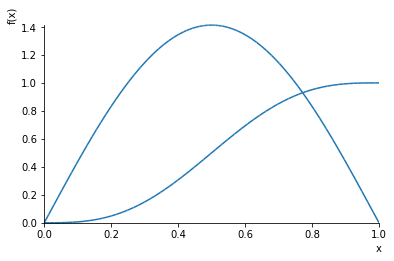

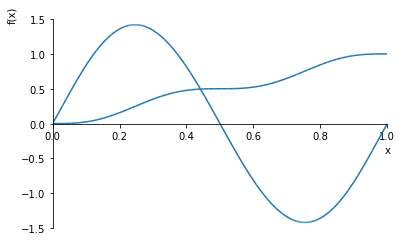

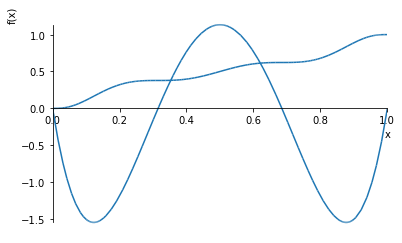

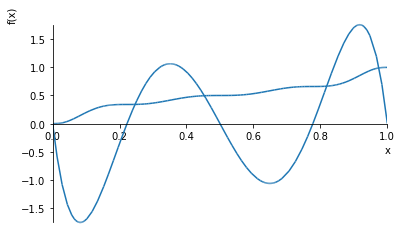

In [35]:
#Graficar phi y |phi|^2------------------------------------------------------------------------!!!
PHISSQ = zeros(len(C), 1)
for a in range(1, len(C)+1):
    PHISSQ[a-1] = PHIS[a-1]**2
INTPHISSQ = integrate(PHISSQ, x)
plot((PHIS.subs(l, 1)[0], (x, 0, 1)), (INTPHISSQ.subs(l, 1)[0], (x, 0, 1)))
plot((PHIS.subs(l, 1)[1], (x, 0, 1)), (INTPHISSQ.subs(l, 1)[1], (x, 0, 1)))
plot((PHIS.subs(l, 1)[2], (x, 0, 1)), (INTPHISSQ.subs(l, 1)[2], (x, 0, 1)))
plot((PHIS.subs(l, 1)[3], (x, 0, 1)), (INTPHISSQ.subs(l, 1)[3], (x, 0, 1)))

In [36]:
print("Esta linea sólo es para compara con los resultados del libro.")
var('X')
PHIS.subs(x, X*l).evalf()

Esta linea sólo es para compara con los resultados del libro.


⎡                                                       0.5                   
⎢                                  2  2           2 ⎛1 ⎞                      
⎢                4.99034859672658⋅X ⋅l ⋅(-X⋅l + l) ⋅⎜──⎟    + 4.40399751133633
⎢                                                   ⎜ 9⎟                      
⎢                                                   ⎝l ⎠                      
⎢                                                                             
⎢                                                       0.5                   
⎢                  2  2                          2 ⎛ 1 ⎞                      
⎢71.8478164291383⋅X ⋅l ⋅(-X⋅l + 0.5⋅l)⋅(-X⋅l + l) ⋅⎜───⎟    + 16.7823521557751
⎢                                                  ⎜ 11⎟                      
⎢                                                  ⎝l  ⎠                      
⎢                                                                             
⎢                                                   